In [1]:
import numpy as np
from numpy import load
import os
from dotenv import load_dotenv

load_dotenv()

True

In [10]:
RAW_MESHES_PATH = os.path.join(os.getenv("DATA_DIR_PATH"), "processed", "pointclouds")

In [14]:
pc = load(os.path.join(RAW_MESHES_PATH, '17803_Ox-eye_daisy_Leucanthemum_vulgare_pollen_grain.npz'))

In [15]:
pc['normals'], pc['points']

(array([[-0.05813846,  0.44974953,  0.8912605 ],
        [-0.60596261,  0.7942613 , -0.04425275],
        [ 0.83428877,  0.53801392, -0.12042954],
        ...,
        [ 0.88912931, -0.30364857, -0.34241293],
        [-0.40734888, -0.90231454, -0.14105094],
        [-0.5272629 ,  0.69113312, -0.49429632]], shape=(4000, 3)),
 array([[19.03568213, 41.44650811, 26.16255095],
        [28.57994053, 46.55431775, 15.29681343],
        [44.90595886, 39.76004686, 17.21128647],
        ...,
        [45.4065217 , 43.60615136, 16.88409511],
        [23.29662475, 25.45661549, 26.05452943],
        [25.5562588 , 37.93955468,  5.85947037]], shape=(4000, 3)))

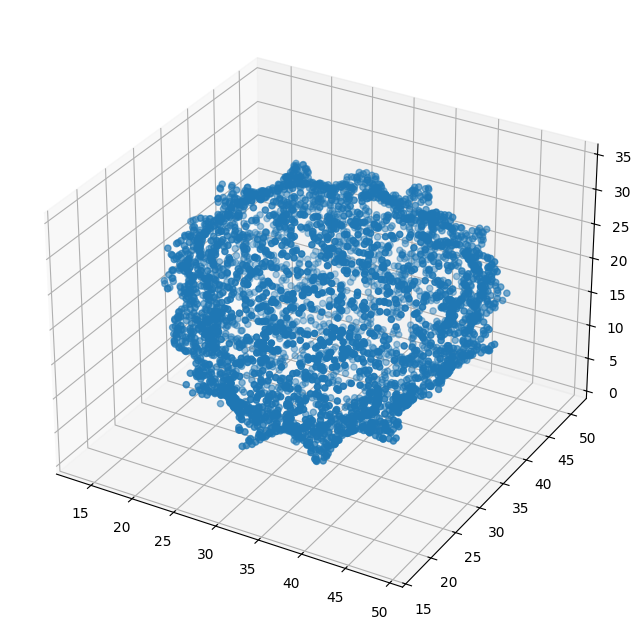

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d

points = pc['points']

x, y, z = points[:, 0], points[:, 1], points[:, 2]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)
plt.show()